<a href="https://colab.research.google.com/github/soneyahossain/Branch-and-Bound/blob/master/omc_ob_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
#join two csv


import pandas as pd

# Read the files into two dataframes.
df1 = pd.read_csv('omc_sc_per_class.csv')
df2 = pd.read_csv('mut_score_per_class.csv')

# Merge the two dataframes, using _ID column as key
df3 = pd.merge(df1, df2, on = 'class')
df3.set_index('class', inplace = True)

# Write it to a new CSV file
df3.to_csv('joda_combined_omc_sc_class.csv')


# Read the files into two dataframes.
df1 = pd.read_csv('omc_sc_per_method.csv')
df2 = pd.read_csv('mut_score_per_method.csv')

# Merge the two dataframes, using _ID column as key
df3 = pd.merge(df1, df2, on = 'method')
df3.set_index('method', inplace = True)

# Write it to a new CSV file
df3.to_csv('joda_combined_omc_sc_method.csv')

In [7]:
df_joda_class = pd.read_csv('joda_combined_omc_ob_class.csv')
df_joda_method = pd.read_csv('joda_combined_omc_ob_method.csv')
df_jaxen_class = pd.read_csv('jaxen_combined_omc_ob_class.csv')
df_jaxen_method = pd.read_csv('jaxen_combined_omc_ob_method.csv')
df_common_class = pd.read_csv('commons_combined_omc_ob_class.csv')
df_common_method = pd.read_csv('commons_combined_omc_ob_method.csv')

for y in range (0,2):
  for x in range(0, 3):

    title=""
    if x==0:
      if y==0:
        df_all=df_joda_class
        title="JODA-TIME"
      else:
        df_all=df_joda_method
        title="joda_method"

    if x==1:
      if y==0:
        df_all=df_common_class
        title="common_class"
      else:
        df_all=df_common_method
        title="common_method"
    if x==2:
      if y==0:
        df_all=df_jaxen_class
        title="jaxen_class"
      else:
        df_all=df_jaxen_method
        title="jaxen_method"


    for index, row in df_all.iterrows():
      if(row['obc(%)']< row['omc_obc(%)']):
        print("assert violation")
      if(row['exp_score']< 0):
        print("assert violation on explicit mutation score ")

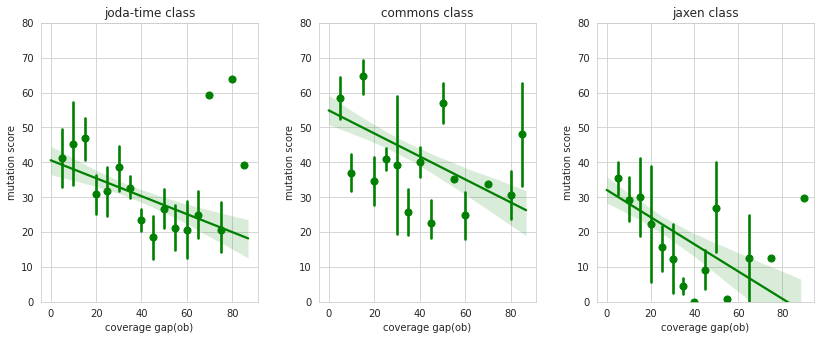

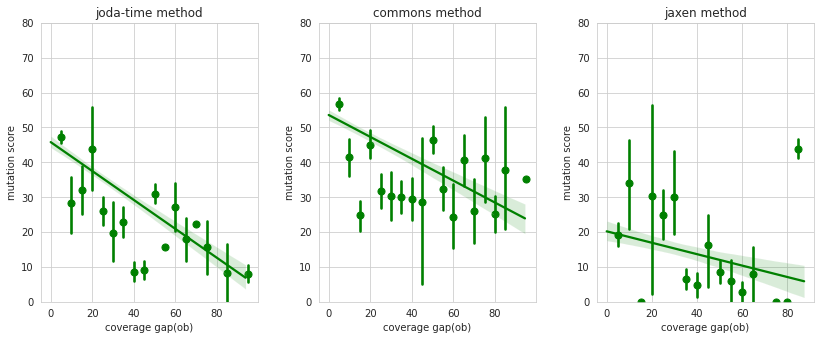

In [63]:
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau
import pandas as pd
import seaborn as sns


sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3,figsize=(12,5))
fig.tight_layout(pad=3.0)


df_joda_class = pd.read_csv('joda_combined_omc_ob_class.csv')
df_joda_method = pd.read_csv('joda_combined_omc_ob_method.csv')
df_jaxen_class = pd.read_csv('jaxen_combined_omc_ob_class.csv')
df_jaxen_method = pd.read_csv('jaxen_combined_omc_ob_method.csv')
df_common_class = pd.read_csv('commons_combined_omc_ob_class.csv')
df_common_method = pd.read_csv('commons_combined_omc_ob_method.csv')

for x in range(0, 3):

  title=""
  if x==0:
    df_all=df_joda_class
    title="joda-time class"
  if x==1:
    df_all=df_common_class
    title="commons class"
  if x==2:
    df_all=df_jaxen_class
    title="jaxen class"
   

  df_all=df_all[df_all["obc(%)"]>50]
  mut_score= df_all['exp_score']
  gap_ob = df_all['cov_gap(%)']

  
  ax[x].set_title(title)
  
  ax[x].set(ylim=(0,80))
  binx=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
  p=sns.regplot(ax=ax[x], x="cov_gap(%)", y="exp_score", data=df_all,ci=68, x_bins=binx, order=1, color='green', truncate=True,fit_reg=True); 

  ax[x].set_xlabel('coverage gap(ob)')
  ax[x].set_ylabel('mutation score')  
plt.show()


sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3,figsize=(12,5))
fig.tight_layout(pad=3.0)

for x in range(0, 3):

  title=""
  if x==0:
    df_all=df_joda_method
    title="joda-time method"
  if x==1:
    df_all=df_common_method
    title="commons method"
  if x==2:
    df_all=df_jaxen_method
    title="jaxen method"
   

  df_all=df_all[df_all["obc(%)"]>50]
  mut_score= df_all['exp_score']
  gap_ob = df_all['cov_gap(%)']

  
  ax[x].set_title(title)
  
  ax[x].set(ylim=(0,80))
  binx=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
  p=sns.regplot(ax=ax[x], x="cov_gap(%)", y="exp_score", data=df_all,ci=68, x_bins=binx, order=1, color='green', truncate=True,fit_reg=True); 

  ax[x].set_xlabel('coverage gap(ob)')
  ax[x].set_ylabel('mutation score')  
plt.show()


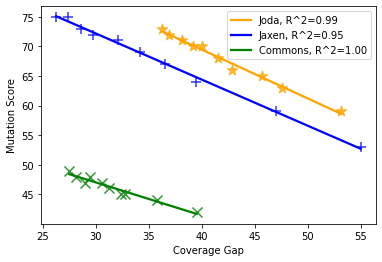

In [68]:
#project level gap vs mutation score 
#control for standard covearge 

from sklearn.metrics import r2_score
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau
import pandas as pd
import seaborn as sns


joda_gap=[76.89177,53.15044,47.58818,45.719025,42.82484,41.513416,40.03618,39.131744,38.151943,36.900814,36.237564]
jaxen_gap=[55.94554,39.515884,35.79425,32.738274,32.405445,31.255674,30.559757,28.956127,29.440243,28.108925,27.473524]
common_gap=[81.12405,54.997467,46.987343,39.47342,36.53671,34.156963,32.081013,29.681011,28.556961,27.402533,26.237974]

joda_gap.pop(0)
jaxen_gap.pop(0)
common_gap.pop(0)

joda_score = [48,59,63,65,66,68,70,70, 71, 72, 73 ]
joda_score = [number - 0 for number in joda_score]
joda_score.pop(0)

slope, intercept, r_value, p_value, std_err = linregress(joda_gap, joda_score)
joda_r_value=r_value*r_value

ax=sns.regplot(x=joda_gap, y=joda_score, order=1,ci=None, color='orange', truncate=True,fit_reg=True, marker='*', scatter_kws={'s':120}) #gives me what I want); 


common_score = [37,53,59,64,67,69,71,72,73,75,75]
common_score = [number - 0 for number in common_score]

common_score.pop(0)
slope, intercept, r_value, p_value, std_err = linregress(common_gap, common_score)
common_r_value=r_value*r_value


ax=sns.regplot(x=common_gap, y=common_score, order=1,ci=None, color='blue', truncate=True,fit_reg=True,  marker='+',scatter_kws={'s':100}); 


jaxen_score = [40,42,44,45,45,46,47,47,48,48,49]
jaxen_score = [number - 0 for number in jaxen_score]
jaxen_score.pop(0)
slope, intercept, r_value, p_value, std_err = linregress(jaxen_gap, jaxen_score)
jaxen_r_value=r_value*r_value


ax=sns.regplot(x=jaxen_gap, y=jaxen_score, order=1, ci=None,color='green', truncate=True,fit_reg=True, marker='x',scatter_kws={'s':100}); 



plt.legend(loc='upper right', labels=['Joda, R^2={:.2f}'.format(joda_r_value), 'Jaxen, R^2={:.2f}'.format(jaxen_r_value), 'Commons, R^2={:.2f}'.format(common_r_value)])
plt.xlabel("Coverage Gap")
plt.ylabel("Mutation Score")

plt.show()






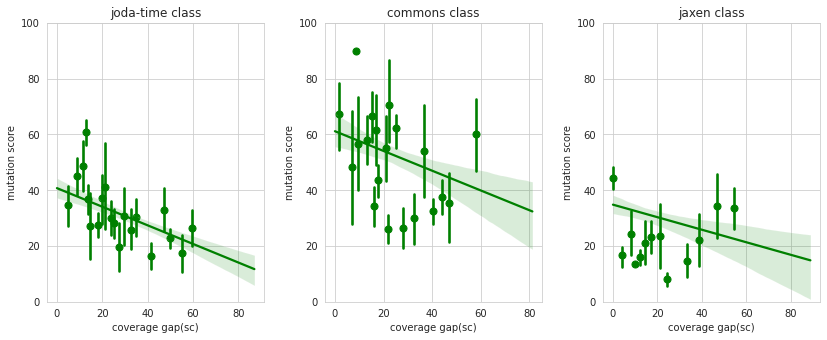

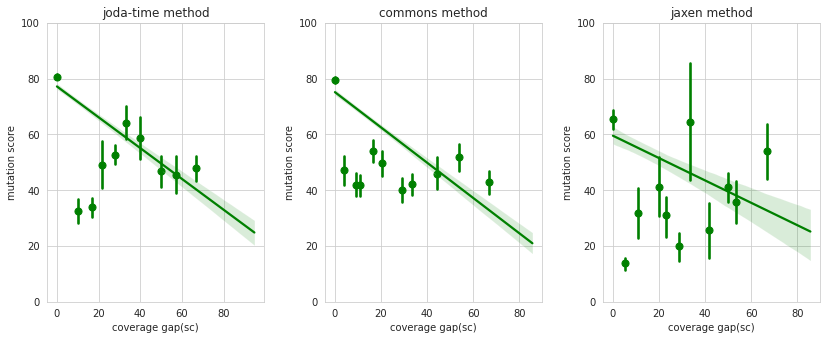

In [138]:
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau
import pandas as pd
import seaborn as sns


sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3,figsize=(12,5))
fig.tight_layout(pad=3.0)


df_joda_class = pd.read_csv('joda_combined_omc_sc_class.csv')
df_joda_method = pd.read_csv('joda_combined_omc_sc_method.csv')
df_jaxen_class = pd.read_csv('jaxen_combined_omc_sc_class.csv')
df_jaxen_method = pd.read_csv('jaxen_combined_omc_sc_method.csv')
df_common_class = pd.read_csv('commons_combined_omc_sc_class.csv')
df_common_method = pd.read_csv('commons_combined_omc_sc_method.csv')

for x in range(0, 3):
  if x==0:
    df_all=df_joda_class
    title="joda-time class"
  if x==1:
    df_all=df_common_class
    title="commons class"
  if x==2:
    df_all=df_jaxen_class
    title="jaxen class"
   

  df_all=df_all[df_all['exp_score']>0]
  mut_score= df_all['exp_score']
  gap_ob = df_all['cov_gap']

  ax[x].set_title(title)
  ax[x].set(ylim=(0,100))
  #binx=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
  p=sns.regplot(ax=ax[x], x="cov_gap", y="exp_score", data=df_all,ci=68, x_bins=20, order=1, color='green', truncate=True,fit_reg=True); 

  ax[x].set_xlabel('coverage gap(sc)')
  ax[x].set_ylabel('mutation score')  
plt.show()


sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3,figsize=(12,5))
fig.tight_layout(pad=3.0)

for x in range(0, 3):
  if x==0:
    df_all=df_joda_method
    title="joda-time method"
  if x==1:
    df_all=df_common_method
    title="commons method"
  if x==2:
    df_all=df_jaxen_method
    title="jaxen method"
   

  df_all=df_all[df_all['exp_score']>0]
  mut_score= df_all['exp_score']
  gap_ob = df_all['cov_gap']

  
  ax[x].set_title(title)
  ax[x].set(ylim=(0,100))
  #binx=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
  p=sns.regplot(ax=ax[x], x="cov_gap", y="exp_score", data=df_all,ci=68, x_bins=30, order=1, color='green', truncate=True,fit_reg=True); 

  ax[x].set_xlabel('coverage gap(sc)')
  ax[x].set_ylabel('mutation score')  
plt.show()
